In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
cell_df= pd.read_csv(r'/content/drive/My Drive/project/cell_samples.csv')

In [5]:
cell_df.tail()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [8]:
cell_df.shape

(699, 11)

In [10]:
cell_df.size


7689

In [11]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [15]:

cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

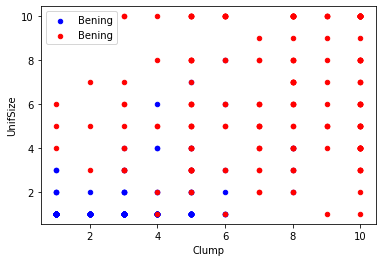

In [21]:
bening_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]
axes = bening_df.plot(kind = 'scatter',x='Clump',y='UnifSize',color='blue',label='Bening')
malignant_df.plot(kind = 'scatter',x='Clump',y='UnifSize',color='red',label='Bening',ax=axes)


In [24]:
cell_df.dtypes
cell_df =cell_df[pd.to_numeric(cell_df['BareNuc'],errors= 'coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [28]:
cell_df.columns
feature_df = cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
Y= np.asarray(cell_df['Class'])   
X= np.asarray(feature_df) 
Y[0:5]      

array([2, 2, 2, 2, 2])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=4)
X_train.shape
Y_train.shape
X_test.shape
Y_test.shape


(137,)

In [34]:
from sklearn import svm
classifier=svm.SVC(kernel= 'linear' ,gamma='auto',C=2)
classifier.fit(X_train,Y_train)
y_predict=classifier.predict(X_test)


In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

